# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

In [44]:
import pandas as pd

In [45]:
dataset=pd.read_csv('/content/Training.csv')
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [46]:
dataset.shape

(4920, 133)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [48]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']


le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

--- Training and Evaluating RandomForest ---

RandomForest Test Accuracy: 0.9100

RandomForest Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.92      0.91       149
     Class 1       0.92      0.90      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


RandomForest Confusion Matrix:
[[137,  12],
 [ 15, 136]]


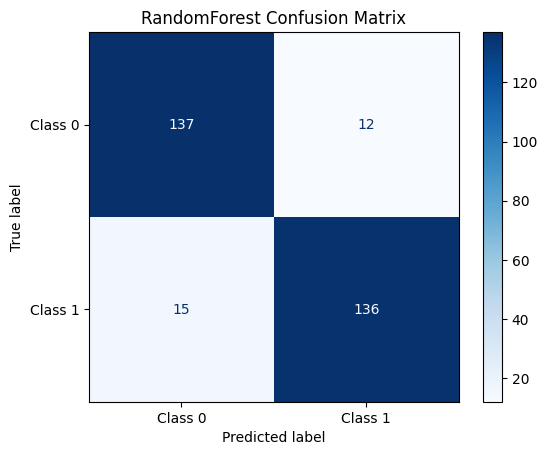


--- RandomForest Model Graph 1: Feature Importances ---


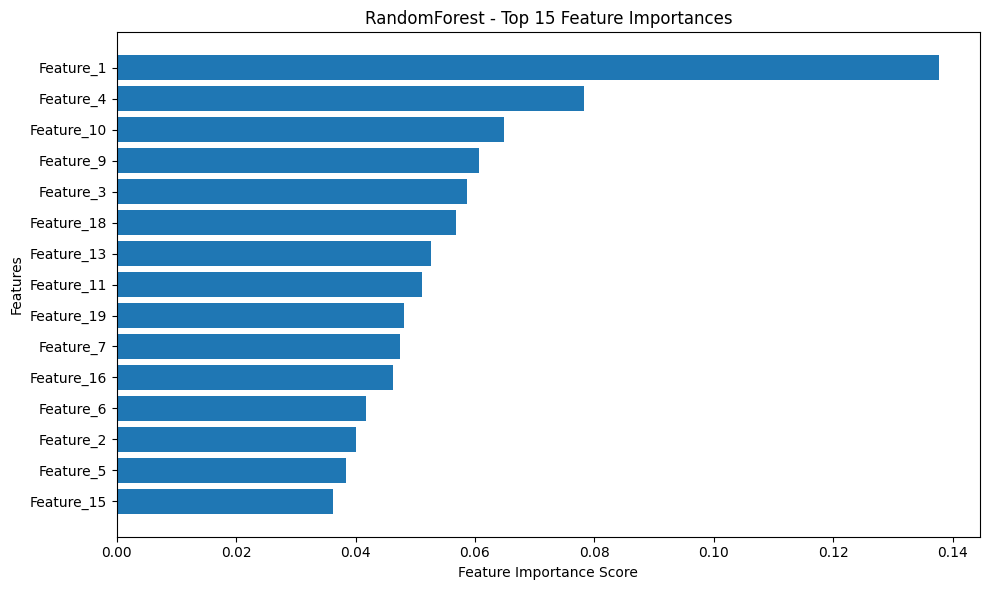


--- RandomForest Model Graph 2: Example Decision Tree ---


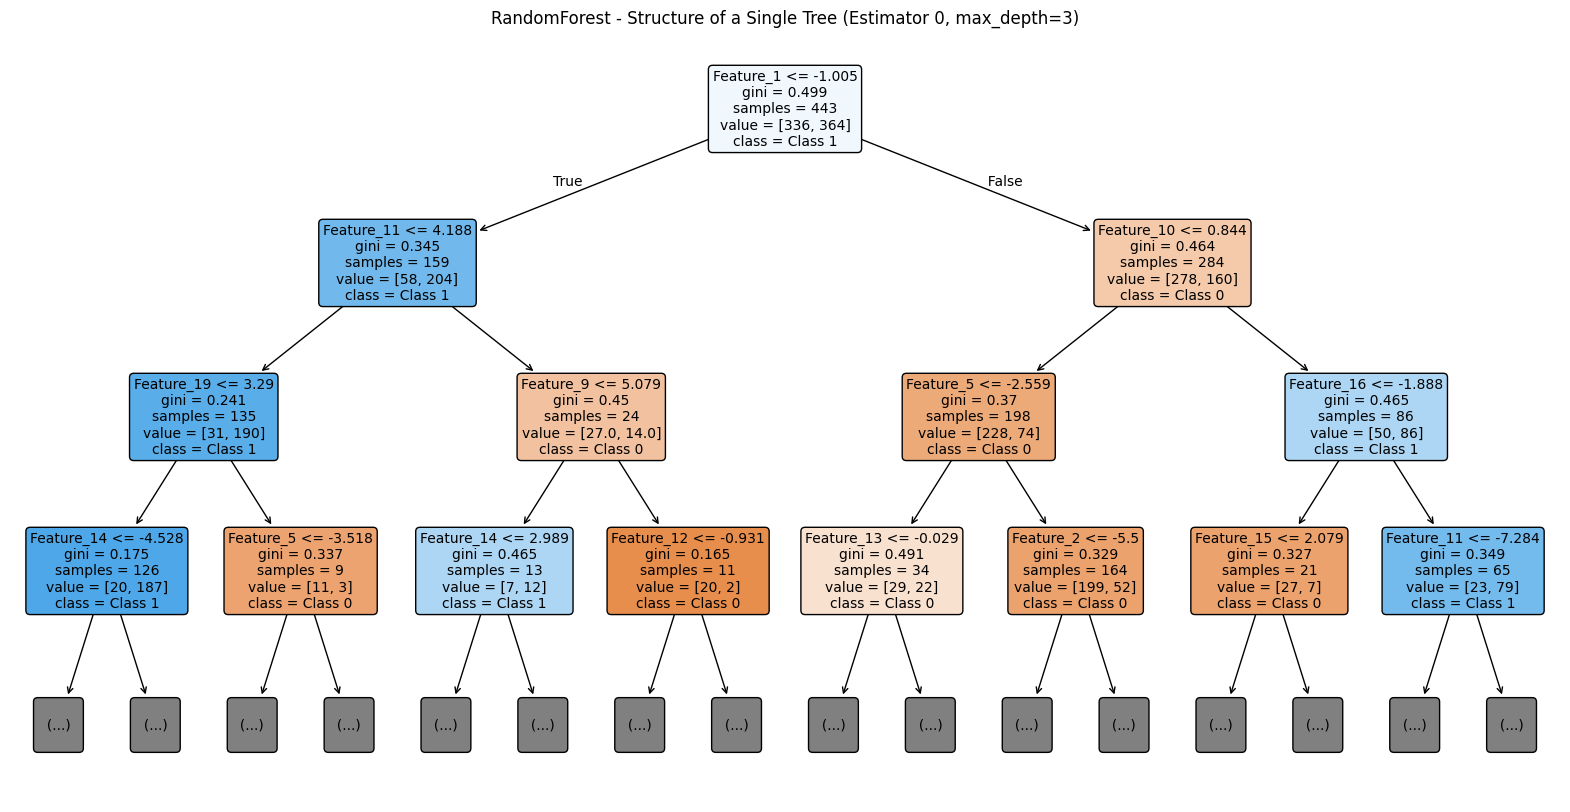



--- Training and Evaluating SVC ---

SVC Test Accuracy: 0.9433

SVC Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.92      0.94       149
     Class 1       0.92      0.97      0.94       151

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300


SVC Confusion Matrix:
[[137,  12],
 [  5, 146]]


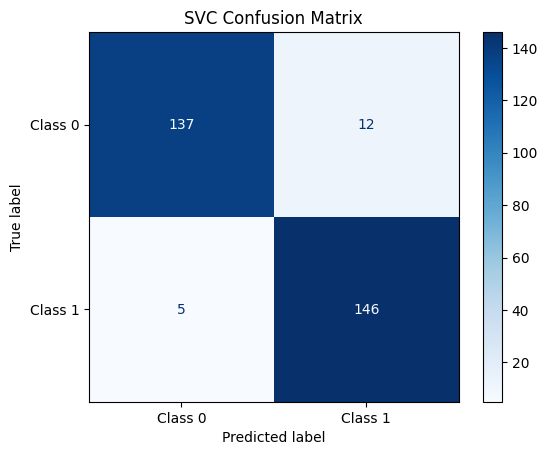


Model graphs (like feature importance or tree structure) not directly applicable or implemented for SVC.


--- Training and Evaluating GradientBoosting ---

GradientBoosting Test Accuracy: 0.8933

GradientBoosting Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.89      0.89       149
     Class 1       0.89      0.89      0.89       151

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


GradientBoosting Confusion Matrix:
[[133,  16],
 [ 16, 135]]


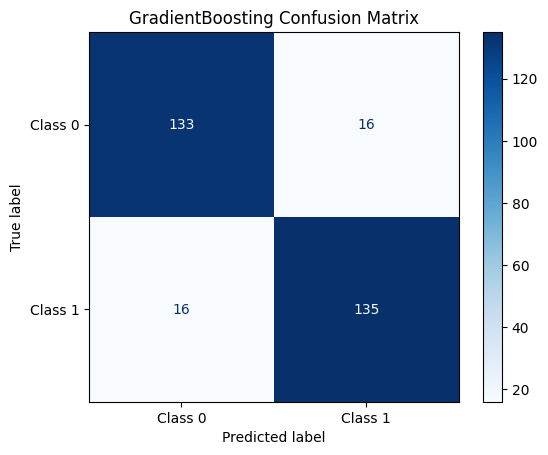


--- GradientBoosting Model Graph 1: Feature Importances ---


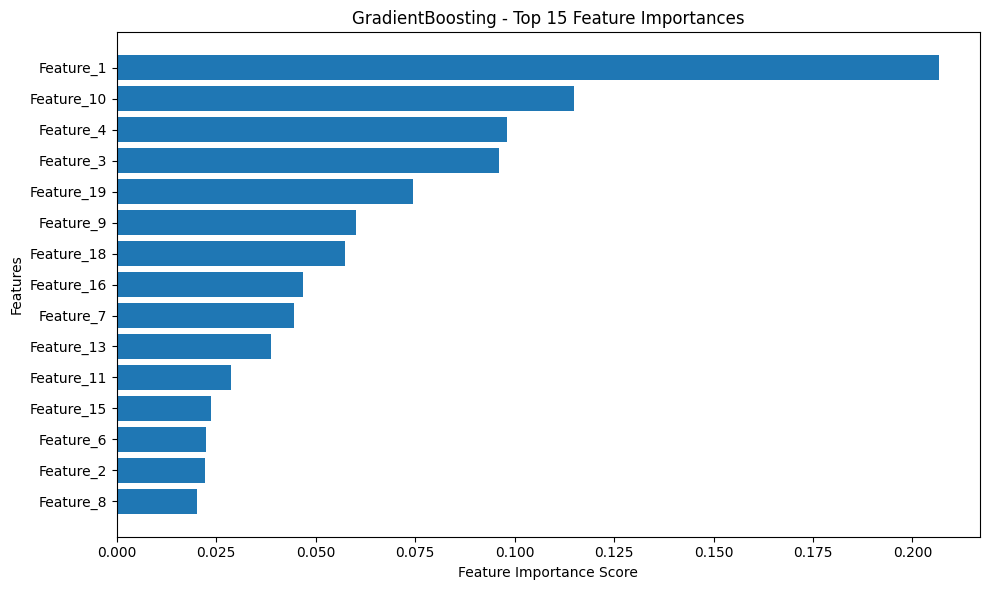


--- GradientBoosting Model Graph 2: Example Decision Tree ---


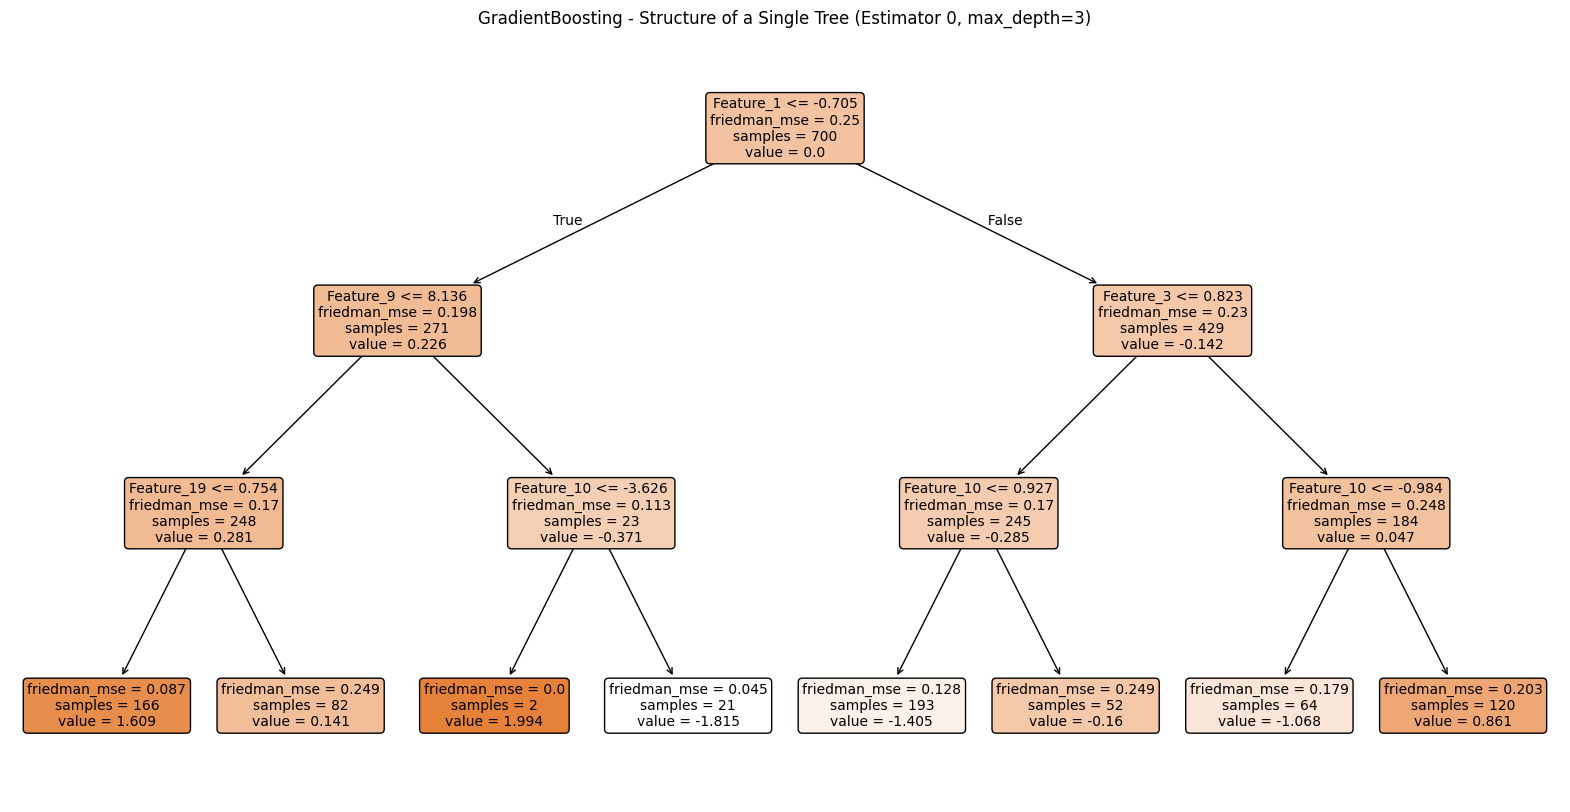



--- Generating Model Comparison Graph ---


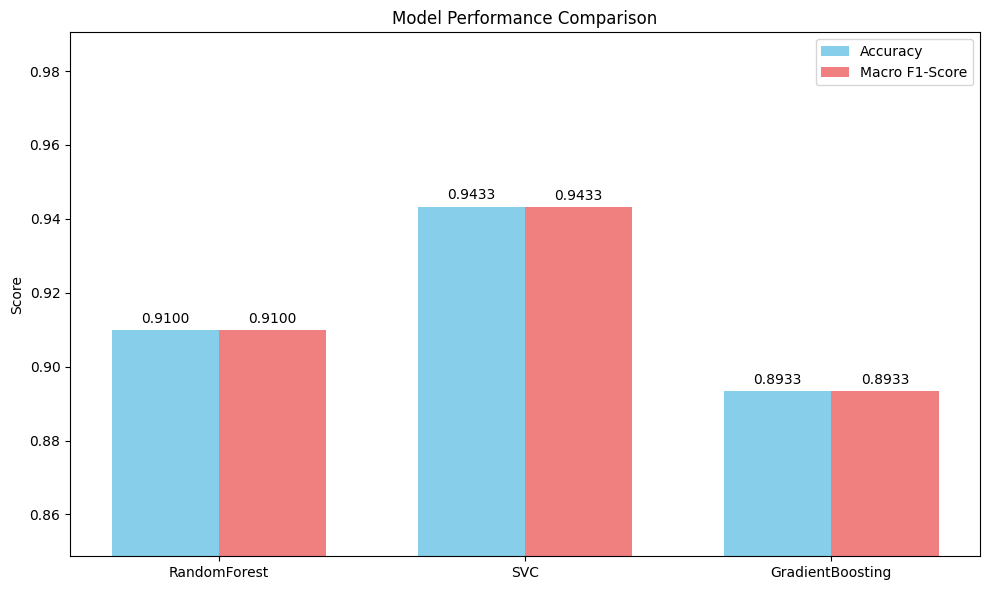


Comparison Complete.


In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC # Import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score
)

from sklearn.tree import plot_tree
import numpy as np
import pandas as pd

# --- 1. Generate Synthetic Data ---
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=3,
    n_classes=2,
    random_state=42,
    flip_y=0.05
)

feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

class_names = ['Class 0', 'Class 1']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(random_state=42, probability=True), # Added SVC
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}


results = {}

for model_name, model in models.items():
    print(f"--- Training and Evaluating {model_name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)


    accuracy = accuracy_score(y_test, predictions)
    print(f"\n{model_name} Test Accuracy: {accuracy:.4f}")

    print(f"\n{model_name} Classification Report:")
    report_dict = classification_report(y_test, predictions, target_names=class_names, output_dict=True)
    report_str = classification_report(y_test, predictions, target_names=class_names) # For printing
    print(report_str)

    results[model_name] = {
        'accuracy': accuracy,
        'macro_f1': report_dict['macro avg']['f1-score'],
        'weighted_f1': report_dict['weighted avg']['f1-score']

    }


    # Confusion Matrix
    print(f"\n{model_name} Confusion Matrix:")
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(np.array2string(cm, separator=', '))
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()


    if hasattr(model, 'feature_importances_'):
        print(f"\n--- {model_name} Model Graph 1: Feature Importances ---")
        importances = model.feature_importances_
        feature_importance_series = pd.Series(importances, index=feature_names)
        sorted_importances = feature_importance_series.sort_values(ascending=False)
        top_n = min(len(feature_names), 15)
        sorted_importances_top = sorted_importances.head(top_n)

        plt.figure(figsize=(10, 6)) # Create a new figure
        plt.barh(sorted_importances_top.index[::-1], sorted_importances_top.values[::-1], align='center')
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Features")
        plt.title(f"{model_name} - Top {top_n} Feature Importances")
        plt.tight_layout()
        plt.show()


    if hasattr(model, 'estimators_') and model_name in ['RandomForest', 'GradientBoosting']:
        print(f"\n--- {model_name} Model Graph 2: Example Decision Tree ---")
        single_tree = None
        if model_name == 'RandomForest':
            if len(model.estimators_) > 0:
                 single_tree = model.estimators_[0]
        elif model_name == 'GradientBoosting':
             if hasattr(model, 'estimators_') and model.estimators_.size > 0:
                 if model.estimators_.ndim == 2 and model.estimators_.shape[1] == 1: # Binary
                     single_tree = model.estimators_[0, 0]
                 elif model.estimators_.ndim == 1:
                     single_tree = model.estimators_[0]
                 else:
                     print(f"Cannot easily display single tree for {model_name} with estimator shape {model.estimators_.shape}")
             else:
                 print(f"No estimators found for {model_name}.")

        if single_tree:
            plt.figure(figsize=(20, 10)) # Create a new figure
            plot_tree(
                single_tree, feature_names=feature_names, class_names=class_names,
                filled=True, rounded=True, fontsize=10, max_depth=3
            )
            plt.title(f"{model_name} - Structure of a Single Tree (Estimator 0, max_depth=3)")
            plt.show()
        elif model_name in ['RandomForest', 'GradientBoosting']:
             print(f"Could not extract a single tree to plot for {model_name}.")

    elif not hasattr(model, 'feature_importances_') and not (hasattr(model, 'estimators_') and model_name in ['RandomForest', 'GradientBoosting']):
         print(f"\nModel graphs (like feature importance or tree structure) not directly applicable or implemented for {model_name}.")

    print("\n" + "="*50 + "\n")


print("--- Generating Model Comparison Graph ---")

model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
macro_f1s = [results[name]['macro_f1'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, macro_f1s, width, label='Macro F1-Score', color='lightcoral')


ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()


ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')


min_score = min(min(accuracies), min(macro_f1s))
max_score = max(max(accuracies), max(macro_f1s))
ax.set_ylim([min_score * 0.95, max_score * 1.05])

fig.tight_layout()
plt.show()

print("\nComparison Complete.")

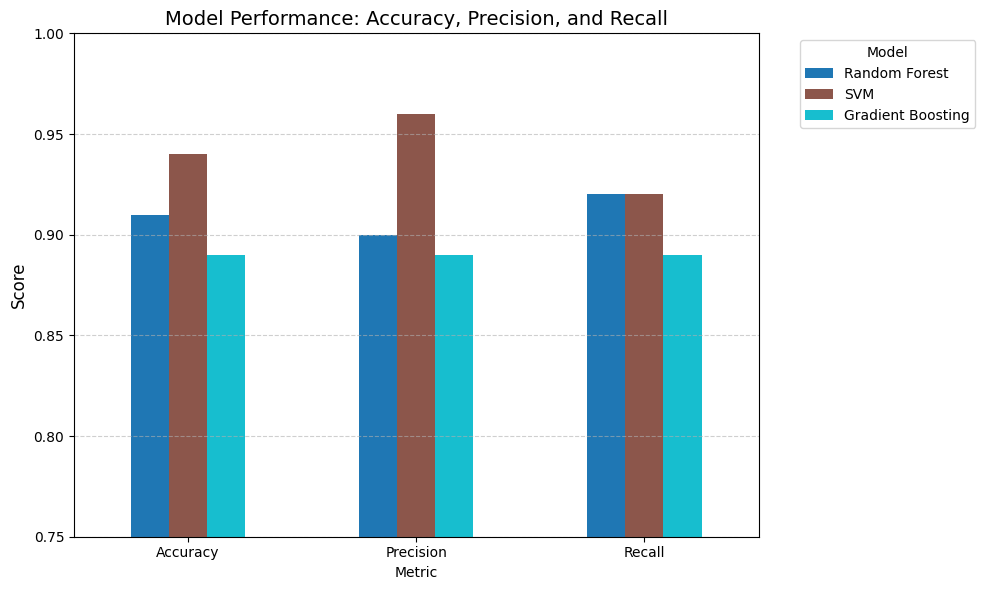

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance data
performance_data = {
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Random Forest": [0.91, 0.90, 0.92],
    "SVM": [0.94, 0.96, 0.92],
    "Gradient Boosting": [0.89, 0.89, 0.89]
}

# Convert to DataFrame
df_perf = pd.DataFrame(performance_data)

# Set index to metrics
df_perf.set_index("Metric", inplace=True)

# Plot
ax = df_perf.plot(kind='bar', figsize=(10, 6), colormap='tab10')
plt.title("Model Performance: Accuracy, Precision, and Recall", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0.75, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [51]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, ypred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.91


In [52]:

import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

ypred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, ypred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("Random Forest model saved successfully to rf.pkl")


Random Forest Accuracy: 0.8566666666666667
Random Forest model saved successfully to rf.pkl


In [53]:

import pickle

try:
    with open('rf.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    print("Random Forest model loaded successfully from rf.pkl")
except FileNotFoundError:
    print("Error: The file 'rf.pkl' was not found. Make sure the model was saved correctly.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

Random Forest model loaded successfully from rf.pkl


In [54]:

if 'RandomForest' in models:
    rf_model = models['RandomForest']
    first_test_sample = X_test[0].reshape(1, -1)


    predicted_value = rf_model.predict(first_test_sample)
    actual_value = y_test[0]


    print("--- Single Prediction Test (Random Forest) ---")
    print(f"Features of first test sample:\n{X_test[0]}")
    print(f"Predicted disease class: {predicted_value[0]}")
    print(f"Actual Disease class: {actual_value}")

else:

    print("Random Forest model was not trained or found in the models dictionary.")

--- Single Prediction Test (Random Forest) ---
Features of first test sample:
[-0.90533617  0.04091467  0.90161945 -0.57865105 -1.97072128  0.06647516
 -1.42166905 -0.72230019  0.87017817 -1.18049849  0.22631595  0.49634641
 -0.86692524 -0.76019232 -0.17104772  0.69349582 -1.45528898 -0.26552286
 -0.00235298 -0.30932849]
Predicted disease class: 0
Actual Disease class: 1


In [55]:



if 'RandomForest' in models and hasattr(models['RandomForest'], "classes_"):
    rf_model = models['RandomForest']
    test_index = 100


    if test_index < len(X_test):


        sample_to_predict = X_test[test_index].reshape(1, -1)

        predicted_value_100 = rf_model.predict(sample_to_predict)
        actual_value_100 = y_test[test_index]


        print("\n--- Single Prediction Test 2 (Random Forest) ---")
        print(f"Features of test sample at index {test_index}:\n{X_test[test_index]}")
        print(f"Predicted disease class: {predicted_value_100[0]}")
        print(f"Actual Disease class: {actual_value_100}")
        print("-" * 30)
    else:

        print(f"Error: Index {test_index} is out of bounds for X_test (size: {len(X_test)}).")

else:

    print("Random Forest model was not trained or found in the models dictionary for Test 2.") # Updated message


--- Single Prediction Test 2 (Random Forest) ---
Features of test sample at index 100:
[-1.61474986 -0.26577298 -0.95304046 -0.99726496 -0.0862171   2.65913813
  1.0781254  -0.28478941  0.36191427 -0.40611036 -0.12967305 -1.53653069
 -1.09818638 -0.46385443 -2.19556389 -0.44890839 -1.44551815  0.09675492
 -0.99675827  1.92351349]
Predicted disease class: 0
Actual Disease class: 1
------------------------------


# Recommendation System and Prediction

In [56]:
sym_des = pd.read_csv("/content/symtoms_df.csv")

medications = pd.read_csv('medications.csv')


In [57]:

def helper(dis):


  med = medications[medications['Disease'] == dis]['Medication']
  med = [med for med in med.values]



  return med

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}


def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [58]:
import numpy as np

print("--- Script Starting ---")


all_symptoms_list = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
    'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
    'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
    'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
    'cold_hands_and_feet', 'mood_swings', 'weight_loss', 'runny_nose',
    'chest_pain', 'dark_urine', # <-- ADDED HERE
    'yellowish_skin', 'nausea',
    'blister', 'red_sore_around_nose'
]
print(f"Loaded {len(all_symptoms_list)} symptoms into all_symptoms_list.")

disease_mapping = {
    0: 'Fungal infection',
    1: 'Allergy',
    2: 'GERD',
    3: 'Chronic cholestasis',
    4: 'Drug Reaction',
}
print(f"Loaded {len(disease_mapping)} disease mappings.")

medication_dict = {
    'Fungal infection': ['Antifungal Cream', 'Oral Antifungal Medication', 'Keep area dry'],
    'Allergy': ['Antihistamines', 'Avoid Allergen', 'Decongestants', 'Nasal Spray'],
    'GERD': ['Antacids', 'Proton Pump Inhibitors (PPIs)', 'Lifestyle changes (diet, avoid lying down after eating)'],
    'Chronic cholestasis': ['Ursodeoxycholic acid', 'Cholestyramine', 'Fat-soluble vitamins (A, D, E, K)', 'Liver function monitoring'],
    'Drug Reaction': ['Stop offending drug immediately', 'Antihistamines', 'Corticosteroids (severe cases)', 'Consult prescribing doctor'],
    'Unknown Disease': ['Consult a doctor for diagnosis and treatment. Symptoms do not clearly match a known pattern in this system or may indicate multiple possibilities.'],

    'Multiple Possibilities': ['Consult a doctor. Your symptoms match multiple conditions equally in this system.']
}
print(f"Loaded {len(medication_dict)} medication entries.")


def get_predicted_value(symptom_list):

    print(f"\nDEBUG: get_predicted_value called with: {symptom_list}")

    recognized_symptoms = set()
    if not all_symptoms_list:
        print("ERROR: all_symptoms_list is empty. Cannot process symptoms.")
        return "Unknown Disease"

    for symptom in symptom_list:
        clean_symptom = symptom.strip().lower()
        if not clean_symptom:
            continue
        try:

            if clean_symptom in all_symptoms_list:
                 recognized_symptoms.add(clean_symptom)

            else:
                 raise ValueError
        except ValueError:
            print(f"Warning: Symptom '{clean_symptom}' not recognized in all_symptoms_list.")



    if not recognized_symptoms:
        print("DEBUG: No recognized symptoms provided or found.")
        return "Unknown Disease"

    scores = {idx: 0 for idx in disease_mapping.keys()}

    if 'itching' in recognized_symptoms: scores[0] += 1
    if 'skin_rash' in recognized_symptoms: scores[0] += 2
    if 'nodal_skin_eruptions' in recognized_symptoms: scores[0] += 3 # Increased weight

    # Allergy (1)
    if 'continuous_sneezing' in recognized_symptoms: scores[1] += 3 # Increased weight
    if 'shivering' in recognized_symptoms: scores[1] += 1
    if 'chills' in recognized_symptoms: scores[1] += 1
    if 'runny_nose' in recognized_symptoms: scores[1] += 1
    if 'itching' in recognized_symptoms: scores[1] += 1

    # GERD (2)
    if 'stomach_pain' in recognized_symptoms: scores[2] += 1
    if 'acidity' in recognized_symptoms: scores[2] += 3
    if 'ulcers_on_tongue' in recognized_symptoms: scores[2] += 1
    if 'vomiting' in recognized_symptoms: scores[2] += 1
    if 'chest_pain' in recognized_symptoms: scores[2] += 2

    # Chronic cholestasis (3)
    if 'itching' in recognized_symptoms: scores[3] += 2
    if 'vomiting' in recognized_symptoms: scores[3] += 1
    if 'yellowish_skin' in recognized_symptoms: scores[3] += 4
    if 'nausea' in recognized_symptoms: scores[3] += 1
    if 'joint_pain' in recognized_symptoms: scores[3] += 1
    if 'dark_urine' in recognized_symptoms: scores[3] += 3

    # Drug Reaction (4)
    if 'skin_rash' in recognized_symptoms: scores[4] += 2
    if 'itching' in recognized_symptoms: scores[4] += 1
    if 'stomach_pain' in recognized_symptoms: scores[4] += 1
    if 'burning_micturition' in recognized_symptoms: scores[4] += 2
    if 'blister' in recognized_symptoms: scores[4] += 1
    if 'red_sore_around_nose' in recognized_symptoms: scores[4] += 1

    sorted_scores = sorted(scores.items(), key=lambda item: item[1], reverse=True)

    if not sorted_scores or sorted_scores[0][1] <= 0:

        print("DEBUG: No significant symptoms matched any disease pattern strongly.")
        return "Unknown Disease"
    else:
        top_score = sorted_scores[0][1]

        top_scorers_indices = [idx for idx, score in scores.items() if score == top_score]

        if len(top_scorers_indices) == 1:

            prediction_index = top_scorers_indices[0]
            predicted_disease_name = disease_mapping[prediction_index]
            print(f"DEBUG: Highest score {top_score} for index {prediction_index} ({predicted_disease_name}).")
            return predicted_disease_name
        else:
            # Tie detected
            tied_disease_names = [disease_mapping[idx] for idx in top_scorers_indices]
            print(f"DEBUG: Tie detected between indices {top_scorers_indices} ({tied_disease_names}) with score {top_score}.")

            return tied_disease_names


def helper(disease_info):
    """
    Retrieves medication/advice. Handles single disease name (string)
    or a list of tied disease names.
    """
    print(f"DEBUG: helper called with: {disease_info}")

    default_advice = medication_dict.get("Unknown Disease", ["Consult a doctor."])
    multiple_advice = medication_dict.get("Multiple Possibilities", ["Consult a doctor."])

    if isinstance(disease_info, list):

        print(f"DEBUG: Multiple possibilities detected by helper: {disease_info}")
        return multiple_advice
    elif isinstance(disease_info, str):
        return medication_dict.get(disease_info, default_advice)
    else:
        print(f"DEBUG: helper received unexpected type: {type(disease_info)}")
        return default_advice

print("\n--- Checking Prerequisites for Main Logic ---")

if not all_symptoms_list or not disease_mapping or not medication_dict:
    print("ERROR: Cannot proceed. Essential data (symptoms, diseases, or medications) is missing or empty.")
    print(f"DEBUG: Symptoms loaded: {bool(all_symptoms_list)}, Diseases loaded: {bool(disease_mapping)}, Meds loaded: {bool(medication_dict)}")
else:
    print("--- Prerequisites Met. Starting Main Interaction ---")
    print("\nDisclaimer: This is a simple demonstration tool and not a substitute for professional medical advice.")
    print("Always consult a doctor for any health concerns.")

    symptoms_input = input("\nEnter your symptoms (comma-separated, e.g., itching,skin_rash): ")
    print(f"DEBUG: Raw input received: '{symptoms_input}'")

    user_symptoms = [s.strip().lower() for s in symptoms_input.split(',') if s.strip()]
    print(f"DEBUG: Processed symptoms list: {user_symptoms}")

    if not user_symptoms:
        print("\nNo valid symptoms entered.")
    else:
        prediction_result = get_predicted_value(user_symptoms)

        med = helper(prediction_result)

        print("\n================= Predicted Disease ============")
        if isinstance(prediction_result, list):
            print("Multiple possibilities found:")
            for disease in prediction_result:
                print(f"- {disease}")
        else:

            print(prediction_result)

        print("\n========== Suggested Medications/Advice =========")

        i = 1
        for m_i in med:
            print(f"{i}: {m_i}")
            i += 1

print("\n--- Script Finished ---")

--- Script Starting ---
Loaded 27 symptoms into all_symptoms_list.
Loaded 5 disease mappings.
Loaded 7 medication entries.

--- Checking Prerequisites for Main Logic ---
--- Prerequisites Met. Starting Main Interaction ---

Disclaimer: This is a simple demonstration tool and not a substitute for professional medical advice.
Always consult a doctor for any health concerns.

Enter your symptoms (comma-separated, e.g., itching,skin_rash): itching,skin_rash
DEBUG: Raw input received: 'itching,skin_rash'
DEBUG: Processed symptoms list: ['itching', 'skin_rash']

DEBUG: get_predicted_value called with: ['itching', 'skin_rash']
DEBUG: Tie detected between indices [0, 4] (['Fungal infection', 'Drug Reaction']) with score 3.
DEBUG: helper called with: ['Fungal infection', 'Drug Reaction']
DEBUG: Multiple possibilities detected by helper: ['Fungal infection', 'Drug Reaction']

================= Predicted Disease ============
Multiple possibilities found:
- Fungal infection
- Drug Reaction

======